In [1]:
import json
import cell
import imp

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from cell import plot_utils, math_utils, graph_utils

In [2]:
parent_dir = "/home/pogo/work_dir/GNN/NPP_MNE/"
output_dir = parent_dir + "/NPP_output/Stellar_WALK_10wpn_10iter/"

In [3]:
ref_df = pd.read_csv("/home/pogo/work_dir/GNN/dat/cl_df_150cl.csv", index_col="Unnamed: 0")
ref_df.head()

,cluster_id,cluster_label,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color,dendcluster_id,dendcluster_label,dendcluster_color,mu_x,mu_y
1,61,L2/3 IT VISp Rrad,#D9F077,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,1.0,L2/3 IT VISp Rrad,#D9F077,0.155991,-0.443063
2,62,L2/3 IT VISp Adamts2,#A6E6A9,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,2.0,L2/3 IT VISp Adamts2,#A6E6A9,0.333016,-0.540455
3,63,L2/3 IT VISp Agmat,#7AE6AB,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,3.0,L2/3 IT VISp Agmat,#7AE6AB,0.323327,-0.576560
4,64,L2/3 IT ALM Sla,#82AD7D,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,4.0,L2/3 IT ALM Sla,#82AD7D,0.498074,-0.641736
5,65,L2/3 IT ALM Ptrf,#B8FFCA,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1,5.0,L2/3 IT ALM Ptrf,#B8FFCA,0.481052,-0.634547


In [4]:
nlayer=37

base = np.load(output_dir + "base.npy")

tran = {}
addition = {}
v = {}
for i in range(nlayer):
    tran[i+1] = np.load(output_dir +  "tran_" + str(i+1) + ".npy")
    addition[i+1] = np.load(output_dir + "addition_" + str(i+1) + ".npy")
    v[i+1] = 0.5* np.dot(addition[i+1], tran[i+1]) + base
    
with open(output_dir + "/index2word.json") as json_file:
    nodes = json.load(json_file)

In [25]:
tmp = pd.DataFrame({"cluster_id": nodes})
tmp['cluster_id'] = tmp['cluster_id'].astype(int)
tmp = tmp.merge(ref_df[['cluster_id', 'cluster_color']], on = "cluster_id")

In [27]:
tmp.head()

,cluster_id,cluster_color
0,59,#AF3F64
1,51,#ED4C50
2,47,#BF8219
3,48,#994C00
4,85,#7F9922


Local Layer embeddings


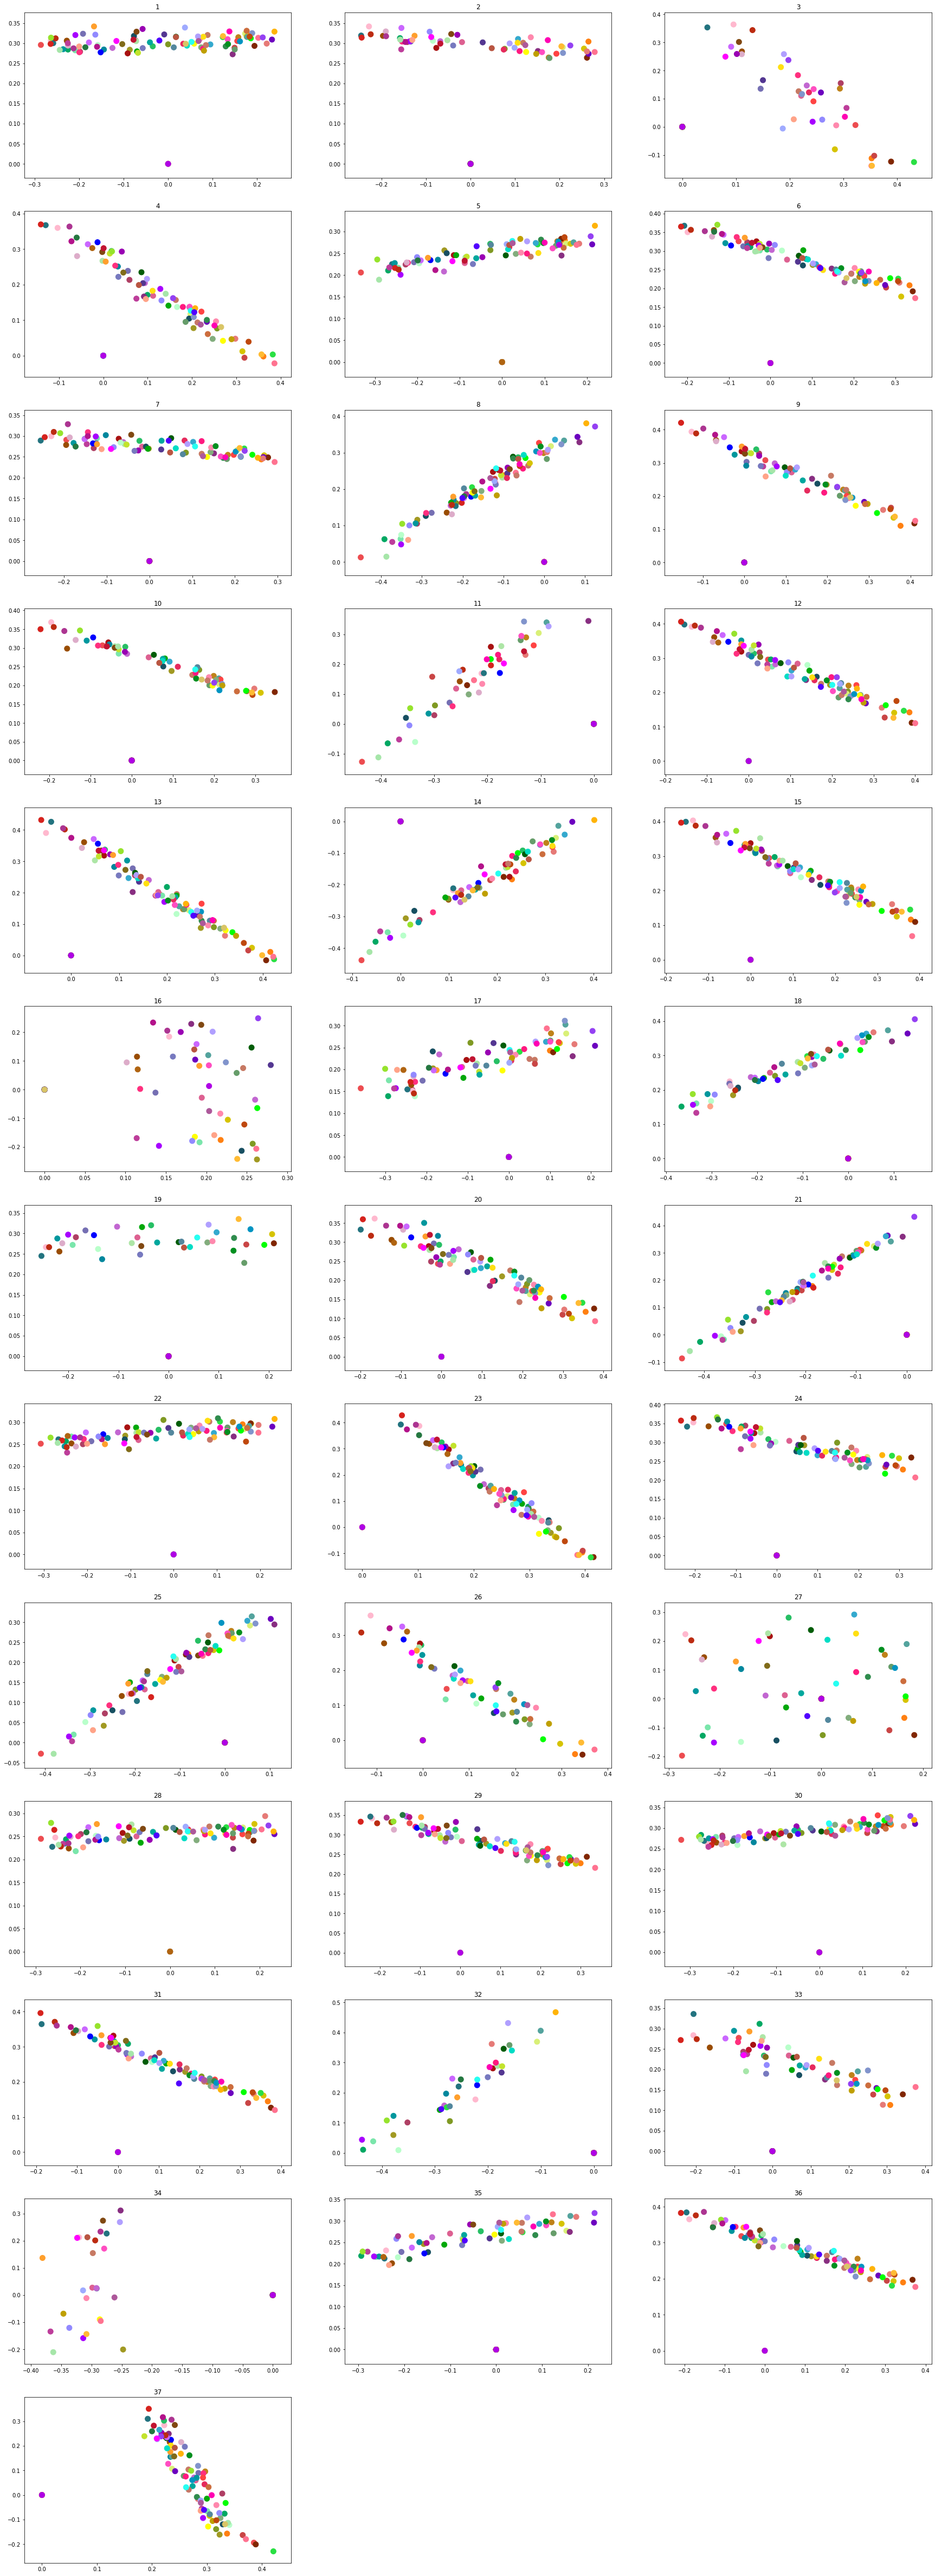

Final Layer embeddings


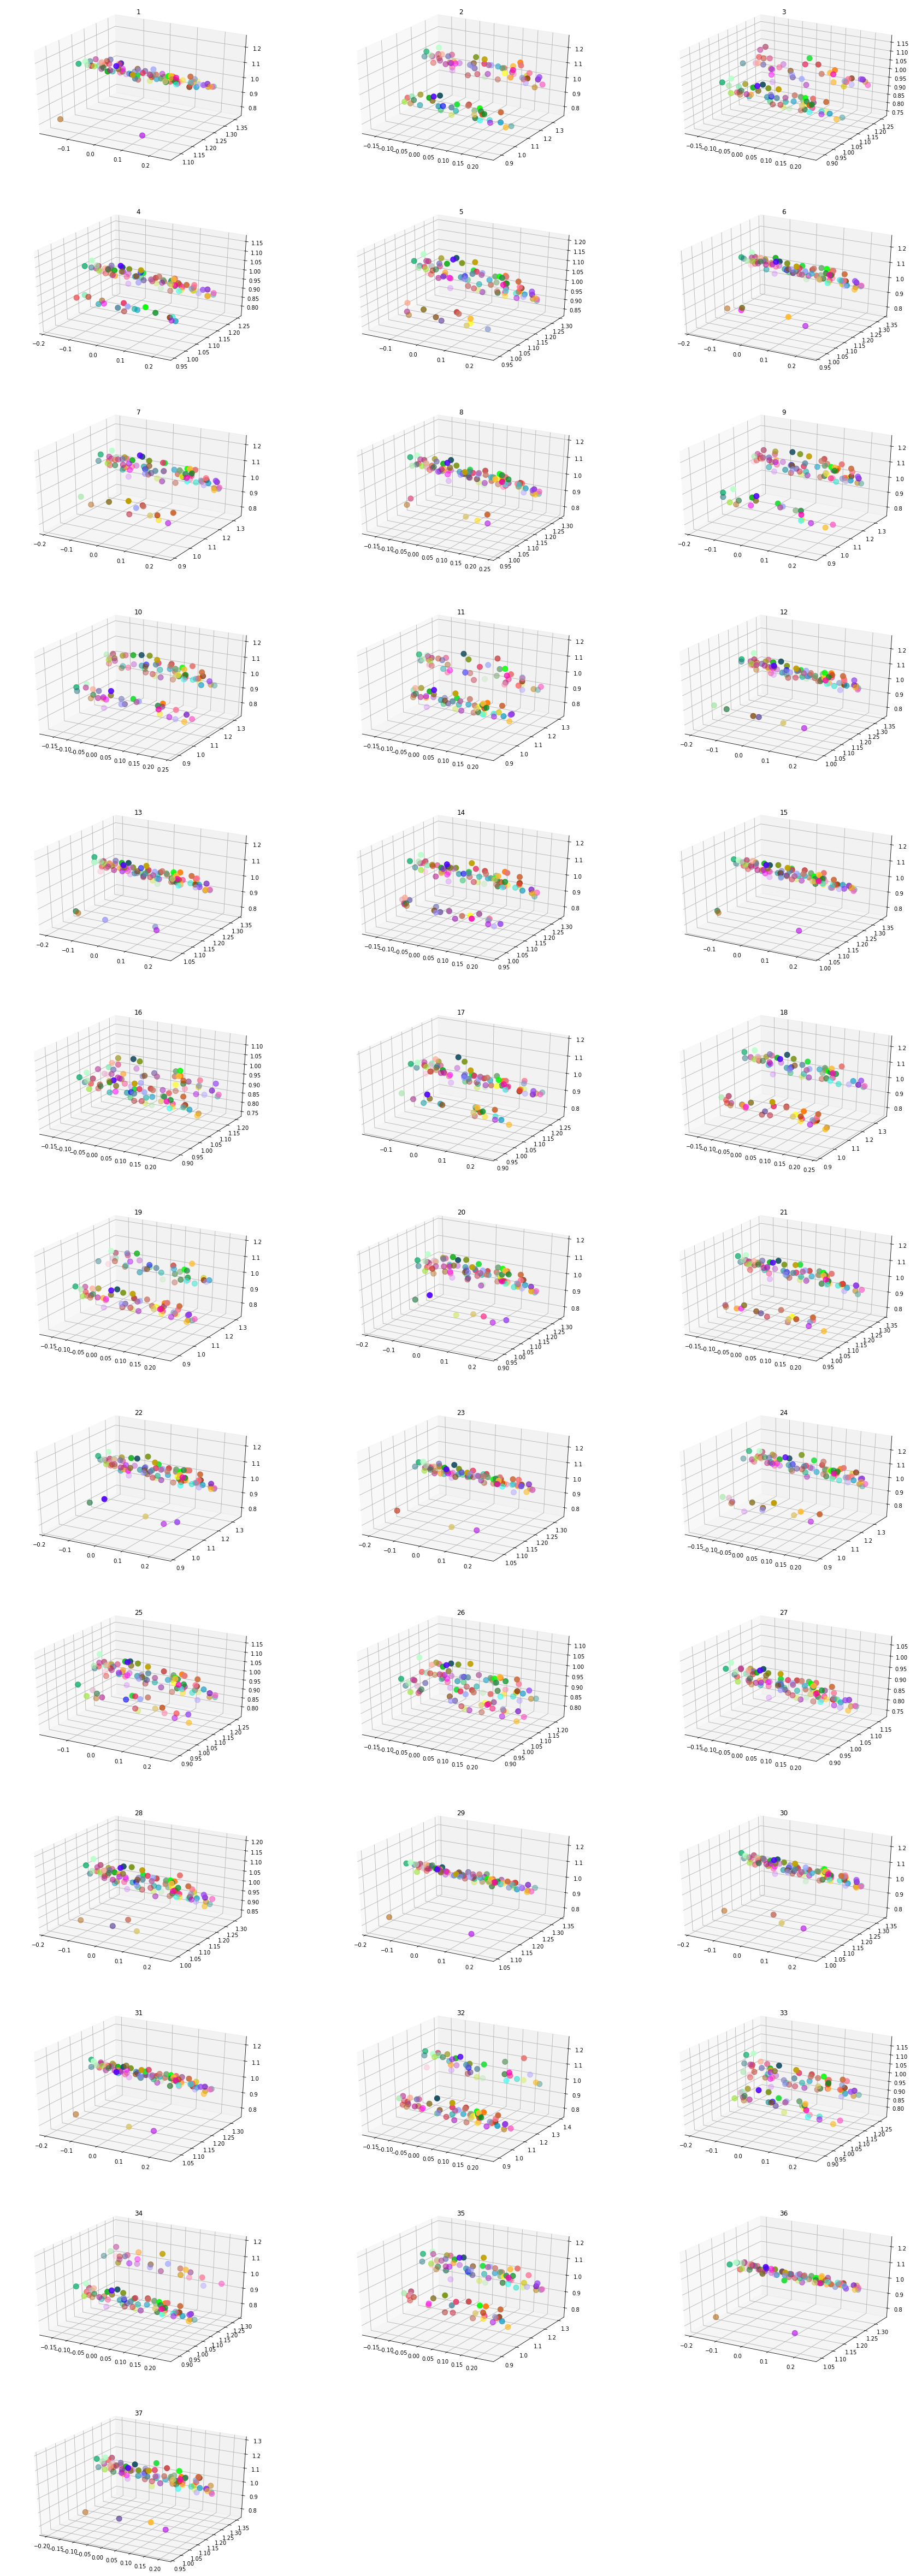

<Figure size 2160x7200 with 0 Axes>

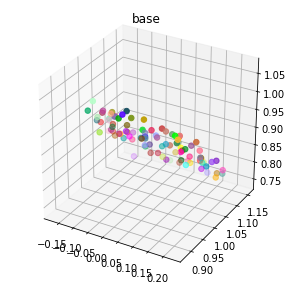

In [35]:
for j, d in enumerate([addition, v, base]):
    
    fig = plt.figure(figsize=(30,100))
    i = 1

    if j == 2:
        emb = pd.DataFrame(base[:,:3])
        emb.columns = ['Z0', "Z1", "Z2"]
        emb[['node_id', 'node_color']] = tmp
        fig = plt.figure(figsize=(5,5))

        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(emb['Z0'], emb['Z1'], emb['Z2'], color= emb['node_color'], s=30)
        ax.set_title("base")
        plt.savefig(output_dir + "base0.png")
        plt.show()
        
    elif j == 0:
        print("Local Layer embeddings")
        for key ,val in d.items():
            emb = pd.DataFrame(val[:,:2])
            emb.columns = ['Z0', "Z1"]
            emb[['node_id', 'node_color']] = tmp
   
            ax = fig.add_subplot(15,3,i)
            ax.scatter(emb['Z0'], emb['Z1'], color= emb['node_color'], s=100)
            ax.set_title(key)
            i = i+1
            
        plt.savefig(output_dir + "u.png")
        plt.show()
 
    else:
        print("Final Layer embeddings")
        
        for key ,val in d.items():
            emb = pd.DataFrame(val[:,:3])
            emb.columns = ['Z0', "Z1", "Z2"]
            emb[['node_id', 'node_color']] = tmp
   
            ax = fig.add_subplot(15,3,i, projection='3d')
            ax.scatter(emb['Z0'], emb['Z1'], emb['Z2'], color= emb['node_color'], s=100)
            ax.set_title(key)
            i = i+1
            
        plt.savefig(output_dir + "v.png")
        plt.show()